In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

RANDOM_SEED = (99565 + 102184 + 97775 + 99635) // 4

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

# Ejercicio 1

Un servidor recibe solicitudes las cuales son procesadas de una por vez en el orden de llegada (política FIFO).
Se determinó que en 10 milisegundos existe una probabilidad 𝑝 = 1/40 que llegue una nueva solicitud y una probabilidad, 𝑞 = 1/30 que una solicitud termine de ser procesada y deje el sistema.

Se desea estudiar la cantidad de solicitudes en el servidor considerando tanto las que están en cola esperando ser procesadas como la solicitud que está siendo procesada.

Se pide:

1. Determinar la matriz de transición de estados explicando cómo se obtiene la misma.
2. Utilizando Matlab, Octave o Python simular la evolución del sistema a lo largo de 1.000 segundos.
3. Realizar un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo.
4. Realizar un histograma mostrando cuántas veces el sistema estuvo en cada estado.
5. Determinar el % de tiempo que el servidor se encuentra sin procesar solicitudes.

Suponer que el sistema puede tener como máximo 30 estados posibles y que el servidor comienza sin estar
procesando solicitudes.

**Planteamos el siguiente grafo en representación de la cadena de Markov, donde cada estado representa la cantidad de solicitudes pendientes en el servidor:**

![Cadena de Markov](markov.png "Grafo representando la cadena de Markov")

**Determinar la matriz de transición de estados explicando cómo se obtiene la misma.**

Cada coeficiente $a_{ij}$ de la matriz de transición de estados se obtiene según la probabilidad de pasar del estado i al estado j. Se deben analizar particularmente las transiciones de tres posibles estados:
- Las transiciones del estado 0
- Las transiciones del estado `i`, con `1 <= i <= 28`
- Las transiciones del estado 30

**Transiciones del estado 0**

En el estado 0 sólamente existe la posibilidad de que arribe una nueva solicitud y se pase al estado `1`, que sucede con probabilidad `p`, o que no arribe ninguna solicitud y se permanezca en el estado `0`, que sucede con probabilidad `1 - p`.

**Transiciones del estado i, con `1 <= i <= 28`**

En el estado `i` podemos definir cuatro posibles escenarios:
 - Que arribe una solicitud y no se resuelva ninguna solicitud pendiente, pasando al estado `i + 1`, con probabilidad p * (1 - q)
 - Que no arribe ninguna solicitud y se resuelva una solicitud pendiente, pasando al estado `i - 1`, con probabilidad (1 - p) * q
 - Que arribe una solicitud y se resuelva una solicitud pendiente, permaneciendo en el estado `i`, con probabilidad p * q
 - Que no arribe ninguna solicitud y no se resuelva ninguna solicitud pendiente, permaneciendo en el estado `i`, con probabilidad (1 - p) * (1 - q)

Quedan definidas entonces tres transiciones:
 - De `i` a `i + 1`, con probabilidad p * (1 - q)
 - De `i` a `i - 1`, con probabilidad (1 - p) * q
 - Permanecer en `i`, con probabilidad p * q + (1 - p) * (1 - q)
 
**Transiciones del estado 30**

En el estado 30 sólamente existe la posibilidad de resolver una solicitud y pasar al estado `29`, con probabilidad `q`, o que no se resuelva ninguna solicitud y se permanezca en el estado `30`, con probabilidad `1 - q`. Se asume que cuando el servidor está en el estado 30 rechaza nuevas solicitudes.

In [35]:
def generar_matriz():
    matriz = [ [0 for _ in range(30)] for _ in range(30) ]
    for f in range(1, 29):
        matriz[f][f-1] = 1/30 * 39/40
        matriz[f][f] = 1/30 * 1/40 + 29/30 * 39/40
        matriz[f][f+1] = 1/40 * 29/30
    
    matriz[0][0] = 39/40
    matriz[0][1] = 1/40
    matriz[29][29] = 29/30
    matriz[29][28] = 1/30
    return matriz

def imprimir_matriz(matriz):
    for fila in matriz:
        for e in fila:
            if e == 0:
                print('  0', end=' ')
            else:
                print(f'{e :.2f}'[1:], end=' ')
        print()

matriz = generar_matriz()
imprimir_matriz(matriz)

.97 .03   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
.03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0 .03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0 .03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0 .03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0 .03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0 .03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0 .03 .94 .02   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0 .03 

In [11]:
# Maquina de estados con probabilidades:
# 0 -> 1: 1/40
# 0 -> 0: 39/40
# i -> i + 1: 1/40 * 29/30 = 0.0242
# i + 1 -> i: 1/30 * 39/40 = 0.0325
# i -> i: 1/30 * 1/40 + 29/30 * 39/40 = 0.9433
# i >= 1

In [12]:
def transicion(estado_anterior, u):
    if estado_anterior == 0:
        if u < 1/40:
            return estado_anterior + 1
        return estado_anterior
    # else
    if u < 0.0242:
        return estado_anterior + 1
    elif u < 0.0242 + 0.0325:
        return estado_anterior - 1
    return estado_anterior

In [13]:
estado_actual = 0
estados = [estado_actual]
for _ in range(int(1000 / 0.01)):
    estado_actual = transicion(estado_actual, random.random())
    estados.append(estado_actual)

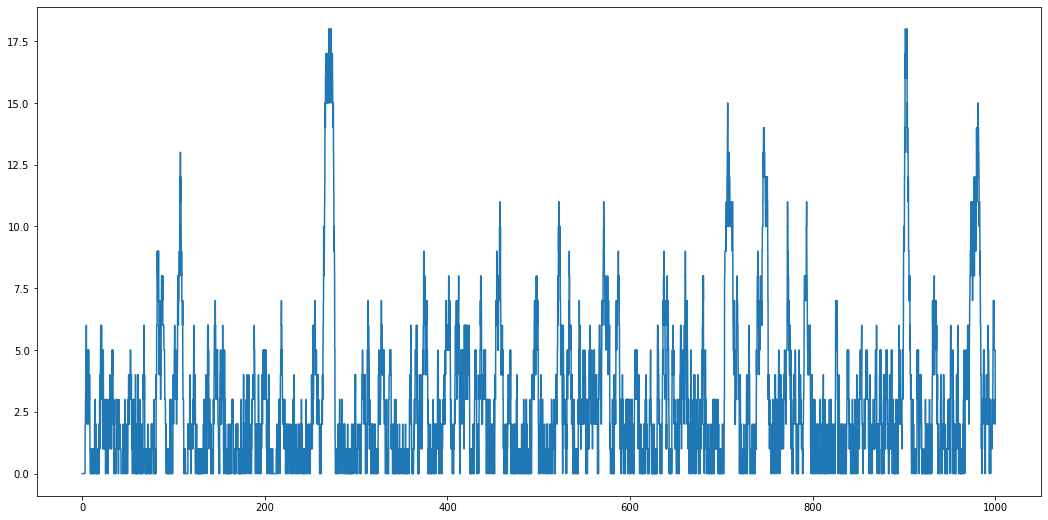

In [14]:
plt.figure(figsize=(18,9))
plt.plot(np.linspace(0, 1000, 100001), estados);

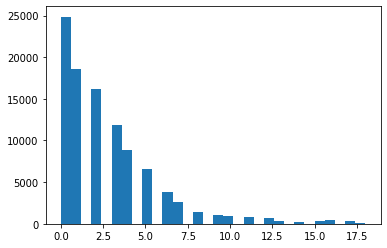

In [15]:
plt.hist(estados, bins=30);

In [16]:
25000/len(estados)

0.24999750002499976

In [17]:
def generar_matriz():
    matriz = [ [0 for _ in range(30)] for _ in range(30) ]
    for f in range(1, 29):
        matriz[f][f-1] = 1/30 * 39/40
        matriz[f][f] = 1/30 * 1/40 + 29/30 * 39/40
        matriz[f][f+1] = 1/40 * 29/30
    
    matriz[0][0] = 39/40
    matriz[0][1] = 1/40
    matriz[29][29] = 29/30
    matriz[29][28] = 1/30
    return matriz

In [28]:
print('\n'.join(map(lambda fila: ','.join(f'{e : .2g}' for e in fila), (fila for fila in generar_matriz()))))

 0.97, 0.025, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0, 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0, 0, 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0, 0, 0, 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
 0, 0, 0, 0, 0, 0, 0, 0, 0.033, 0.94, 0.024, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Ejercicio 2

Se tiene un sistema el cual depende de 3 variables y se puede suponer discreto en el tiempo.
Su comportamiento está regido por las siguientes reglas:

$$2 x_t = x_{t-1} + 2 y_{t-1} $$
$$ y_t = y_{t-1} - \frac{x_{t-1}}{2} $$
$$ z_t = z_{t-1} - \left(x_{t-1} + y_{t-1}\right) $$

Se pide:
1. Determinar los puntos de equilibrio del sistema.
2. Graficar el diagrama de fases mostrando 100 iteraciones del sistema considerando como puntos de inicio todos los puntos que se pueden formar con:

$$ x_0 = -1, 0, 1 $$
$$ y_0 = -1, 0, 1 $$
$$ z_0 = -1, 0, 1 $$

In [1]:
# Puntos de equilibrio: (0, 0, z), z real

In [2]:
def simular_sistema(semilla, iteraciones):
    resultado = [semilla]
    for _ in range(iteraciones):
        xa, ya, za = resultado[-1]
        x = (xa + 2*ya) / 2
        y = ya - xa / 2
        z = za - (xa + ya)
        resultado.append((x, y, z))
    return resultado

/tmp/ipykernel_18821/2965923673.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


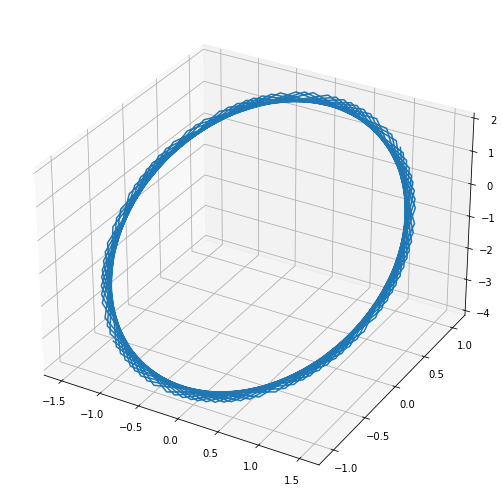

In [23]:
escenario_1 = simular_sistema((1, 1, 1), 100)

xx = [x for x, y, z in escenario_1]
yy = [y for x, y, z in escenario_1]
zz = [z for x, y, z in escenario_1]

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(18,9))
ax = fig.gca(projection='3d')
ax.plot(xx, yy, zz);

# Ejercicio 3

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R. Se conoce que inicialmente el 2.5% de la población se encuentra infectada, toda la población es susceptible de contagiarse, la tasa de transmisión β=0,27, y la tasa de recuperación γ=0,043

Se pide:

1. Implementar el modelo SIR correspondiente con el método Runge Kutta.
2. Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución de la epidemia.
3. Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 25% de la población a la vez, determinar la duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de asistencia médica. ¿Qué parámetros se modifican? ¿Por qué?
4. Probar con 3 juegos distintos de parámetros del modelo y comentar los comportamientos explorados.

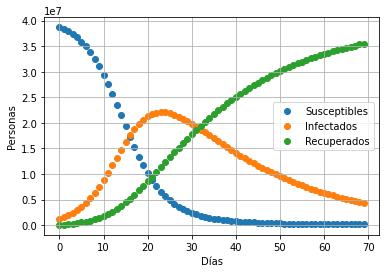

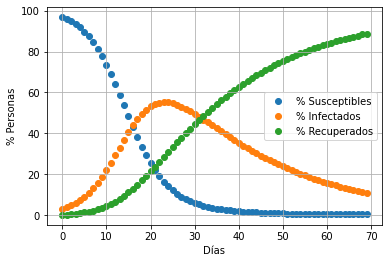

In [21]:
def runge_kutta4(h, beta, N, gamma, u0, v0, w0, intervalo):
    U_correc = []     #susceptibles
    V_correc = []     #infectados
    W_correc = []     #recuperados
    infectados = []
    iteraciones = int(intervalo/h)
    u_n = u0
    v_n = v0
    w_n = w0

    for i in range(0,iteraciones):
        k1_u = h * (-beta/N * u_n * v_n)
        k1_v = h * (beta/N * u_n * v_n - gamma * v_n)
        k1_w = h * (gamma * v_n)

        k2_u = h * (-beta/N * (u_n + 0.5 * k1_u) * (v_n + 0.5 * k1_v))
        k2_v = h * (beta/N * (u_n + 0.5 * k1_u) * (v_n + 0.5 * k1_v) - gamma * (v_n + 0.5 * k1_v))
        k2_w = h * (gamma *  h * (v_n + 0.5 * k1_v))

        k3_u = h * (-beta/N * (u_n + 0.5 * k2_u) * (v_n + 0.5 * k2_v))
        k3_v = h * (beta/N * (u_n + 0.5 * k2_u) * (v_n + 0.5 * k2_v) - gamma * (v_n + 0.5 * k2_v))
        k3_w = h * (gamma *  h * (v_n + 0.5 * k2_v))

        k4_u = h * (-beta/N * (u_n + k3_u) * (v_n + k3_v))
        k4_v = h * (beta/N * (u_n + k3_u) * (v_n + k3_v) - gamma * (v_n + k3_v))
        k4_w = h * (gamma *  h * (v_n + k3_v))

        u_n1 = u_n + 1/6 * (k1_u + 2 * k2_u + 2 * k3_u + k4_u)
        v_n1 = v_n + 1/6 * (k1_v + 2 * k2_v + 2 * k3_v + k4_v)
        w_n1 = w_n + 1/6 * (k1_w + 2 * k2_w + 2 * k3_w + k4_w)

        U_correc.append(int(u_n1))
        V_correc.append(int(v_n1))
        W_correc.append(int(w_n1))

        u_n = u_n1
        v_n = v_n1
        w_n = w_n1

        for i in range(0,len(W_correc)):
            recup_dia=W_correc[i]-W_correc[i-1]
            infectados.append(V_correc[i]-V_correc[i-1]+recup_dia)

    return(U_correc, V_correc, W_correc, infectados)


def plot(lista1, leyenda, escala):
    y = list(map(lambda x: x * escala, lista1))
    x = []
    for i in range(len(lista1)):
        x.append(i)
    plt.scatter(x, y, label = leyenda)


def simular_pandemia():
    N = 40000000
    BETA = 0.27  #contactos suficientes para transmisión 
    GAMMA = 0.043   #cantidad de gente recuperada
    #beta = 0.215 y gamma 0.085 para no superar el 25% de infectados, 270 días totales
    PASO = 1
    VA = N * 0.025
    UA = N - VA
    WA = 0
    intervalo = 70 #igualmente la duración de la pandemia en este caso es un año aprox

    U_correc, V_correc, W_correc, infectados = runge_kutta4(PASO,BETA,N,GAMMA,UA,VA,WA,intervalo)

    #print(max(V_correc)/N)
    #print(V_correc[364])

    plt.xlabel('Días')
    plt.ylabel('Personas')

    plot(U_correc, "Susceptibles", 1)
    plot(V_correc, "Infectados", 1)
    plot(W_correc, "Recuperados", 1)
    plt.legend()
    plt.grid()
    plt.show()

    porcentaje_U = list(map(lambda x: x / N, U_correc))
    porcentaje_V = list(map(lambda x: x / N, V_correc))
    porcentaje_W = list(map(lambda x: x / N, W_correc))

    plt.xlabel('Días')
    plt.ylabel('% Personas')

    plot(porcentaje_U, "% Susceptibles", 100)
    plot(porcentaje_V, "% Infectados", 100)
    plot(porcentaje_W, "% Recuperados", 100)
    plt.legend()
    plt.grid()
    plt.show()

simular_pandemia()